<a href="https://colab.research.google.com/github/joaomarciel2/dimensionalidade/blob/main/Redu%C3%A7%C3%A3o_Dimensinalidade_Tiger_Woods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio DIO - Redução de Dimensionalidade em Imagens para Redes Neurais

Recentemente, mergulhei em um desafio prático da DIO de processamento de imagens utilizando Python, com o objetivo de aplicar técnicas de redução de dimensionalidade. Para isso, escolhi uma imagem colorida do renomado golfista Tiger Woods como ponto de partida. Minha tarefa consistiu em transformar essa imagem, originalmente rica em detalhes e composta por três canais de cor (vermelho, verde e azul), em versões mais simplificadas: uma em tons de cinza e, posteriormente, uma binarizada (preto e branco).


O primeiro passo foi converter a imagem colorida para tons de cinza. Essa etapa crucial representa uma significativa redução de dimensionalidade, pois condensa a informação de cor para apenas a intensidade luminosa de cada pixel. Em seguida, para otimizar a qualidade e preparar a imagem para a segmentação, apliquei um filtro de desfoque Gaussiano. Essa técnica é essencial para suavizar ruídos e realçar as características importantes, facilitando as etapas subsequentes de análise.


Por fim, utilizei o método de limiarização (thresholding) para gerar a versão binarizada da imagem. Aqui, os pixels são representados exclusivamente como preto ou branco, com base em um valor de corte predefinido. Esse processo resultou em uma representação de alta compressão, onde apenas a presença ou ausência de uma característica é destacada.


In [9]:
# Importação das bibliotecas
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [10]:
# Carrega a imagem original
img = cv2.imread('tiger_woods.jpg')

# Carrega a imagem em escala de cinza
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Aplica um desfoque para suavizar a imagem
suave = cv2.GaussianBlur(img, (7,7), 0)

# Aplica limiarização binária: pixels acima de 160 viram 255 (branco), o resto vira 0 (preto)
(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)


# Aplica a limiarização inversa: pixels acima de 160 viram 0, o resto vira 255
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV)

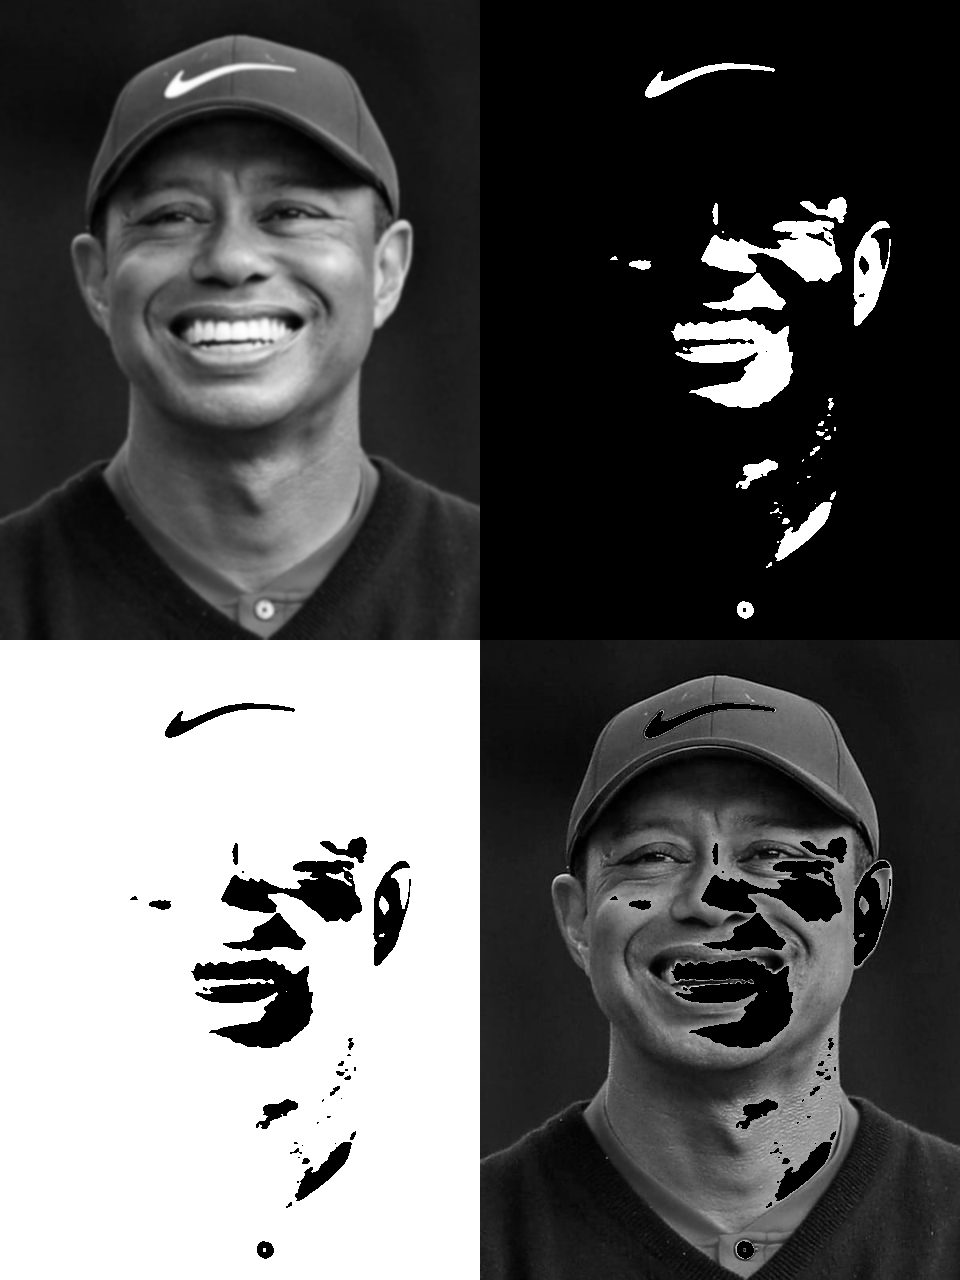

-1

In [11]:
# Empilha as imagens horizontal e verticalmente para visualização
resultado = np.vstack([
    np.hstack([suave, bin]), # imagem suavizada + imagem binarizada
    np.hstack([binI, cv2.bitwise_and(img, img, mask=binI)]) # binarização inversa + recorte da imagem original com máscara binI
    ])

# Exibe o resultado na tela
cv2_imshow(resultado)
cv2.waitKey(0)